# London Housing Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/mighfar/data_analyst_projects/london_housing.csv')
df

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


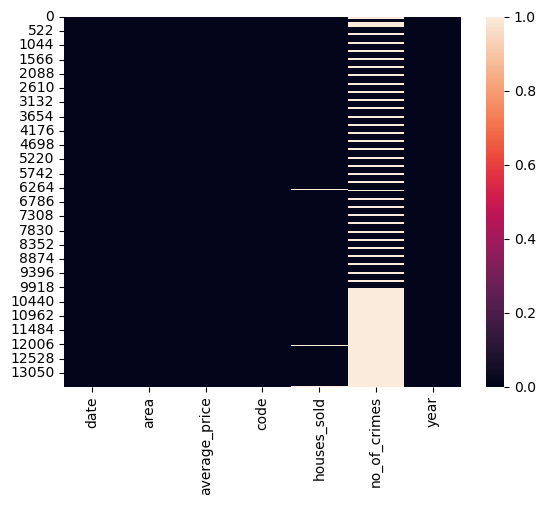

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull())
plt.show()

## Convert the Datatype of 'Date' column to Date-Time format.

In [3]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13549 entries, 0 to 13548
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
13549 non-null  object
dtypes: object(1)
memory usage: 106.0+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13549 entries, 0 to 13548
Series name: date
Non-Null Count  Dtype         
--------------  -----         
13549 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 106.0 KB


## Add a new column ''year'' in the dataframe, which contains years only.

In [17]:
from datetime import datetime as dt
df['year'] = df['date'].dt.year
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


## Add a new column ''month'' in the dataframe, which contains months only.

In [33]:
df.insert(1,'month', df['date'].dt.month)
df.head()

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995


## Remove the columns 'year' and 'month' from the dataframe.

In [16]:
df.drop(columns={'year', 'month'}, inplace=True)
df.head()

KeyError: "['year', 'month'] not found in axis"

## Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?

In [11]:
df[df['no_of_crimes'] == 0].shape

(104, 6)

In [12]:
df[df['no_of_crimes'] == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


## What is the maximum & minimum 'average_price' per year in england ?

In [14]:
df['area'].value_counts()

hackney                   302
south east                302
enfield                   302
tower hamlets             302
redbridge                 301
richmond upon thames      301
southwark                 301
sutton                    301
waltham forest            301
wandsworth                301
westminster               301
inner london              301
outer london              301
city of london            301
merton                    301
north east                301
north west                301
yorks and the humber      301
east midlands             301
west midlands             301
east of england           301
london                    301
south west                301
newham                    301
kingston upon thames      301
lewisham                  301
lambeth                   301
barnet                    301
bexley                    301
brent                     301
bromley                   301
camden                    301
croydon                   301
ealing    

In [22]:
max_agg = df.groupby('year').average_price.max()
min_agg = df.groupby('year').average_price.min()

df_maxmin = pd.DataFrame({'min_avg_price': min_agg, 'max_avg_price': max_agg})
df_maxmin

,min_avg_price,max_avg_price
year,,
1995,41688,200722
1996,40722,223197
1997,42353,265112
1998,43510,277600
1999,43969,354241
2000,47604,397353
2001,49045,451028
2002,54746,497538
2003,67520,488704


## What is the Maximum & Minimum No. of Crimes recorded per area ?

In [23]:
min_crimes = df.groupby('area').no_of_crimes.min()
max_crimes = df.groupby('area').no_of_crimes.max()

df_area_crimes = pd.DataFrame({'min_records': min_crimes, 'max_records': max_crimes})
df_area_crimes

,min_records,max_records
area,,
barking and dagenham,1217.0,2049.0
barnet,1703.0,2893.0
bexley,860.0,1914.0
brent,1850.0,2937.0
bromley,1441.0,2637.0
camden,2079.0,4558.0
city of london,0.0,10.0
croydon,2031.0,3263.0
ealing,1871.0,3401.0


## Show the total count of records of each area, where average price is less than 100000.

In [24]:
df2 = df[df.average_price < 100000]
df2

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...
13330,2001-11-01,england,95083,E92000001,109149.0,NaN,2001
13331,2001-12-01,england,95992,E92000001,93329.0,NaN,2001
13332,2002-01-01,england,96215,E92000001,71678.0,NaN,2002
13333,2002-02-01,england,96676,E92000001,77131.0,NaN,2002


In [29]:
df2['id'] = df2.index

/tmp/ipykernel_21512/4053178754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['id'] = df2.index


In [30]:
df2.groupby('area').id.count()

area
barking and dagenham     85
barnet                   25
bexley                   64
brent                    40
bromley                  33
city of london           11
croydon                  57
ealing                   31
east midlands            96
east of england          76
enfield                  54
england                  87
greenwich                59
hackney                  53
haringey                 33
harrow                   30
havering                 60
hillingdon               44
hounslow                 41
inner london             31
islington                19
kingston upon thames     30
lambeth                  41
lewisham                 62
london                   39
merton                   35
newham                   72
north east              112
north west              111
outer london             46
redbridge                52
south east               59
south west               78
southwark                48
sutton                   54
tower hamlets  